<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/main/ESAA_YB_week12_dimensional_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **차원 축소**

## **차원 축소(Dimensional Reduction) 개요**

차원 축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것이다. 일반적으로 차원이 증가할수록 포인트 간의 거리가 기하급수적으로 멀어져 희소한 구조를 갖게 된다. 따라서, 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어지며, 피처가 많을 경우 상관관계가 높아져 다중 공선성 문제로 성능이 저하될 수 있다.

이렇게 매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있다. 또한, 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어 학습에 필요한 처리 능력도 줄일 수 있다.

일반적으로 차원 축소는 피처 선택(feature selection)과 피처 추출(feature extraction)로 나눌 수 있다. 피처 선택은 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것이고, 피처 추출은 기존 피처를 저차원의 중요 피처로 압축해 추출하는 것이다.

피처 추출은 피처르 ㄹ함축적으로 더 잘 설명할 수 있는 또다른 공간으로 매핑해 추출하는 것으로 기존의 피처와 완전히 다른 값이 된다.

이처럼 차원 축소는 단순히 데이터의 압축을 의미하는 것이 아니다. 더 중요한 의미는 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데에 있다. PCA, SVD, NMF는 이처럼 잠재적인 요소를 찾는 대표적인 차원 축소 알고리즘이다.

이 차원 축소 알고리즘은 매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행할 수 있다. 이렇게 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이기에 과적합 영향력이 작아져 예측 성능을 더 끌어올릴 수 있다.

차원 축소 알고리즘이 자주 사용되는 또 다른 영역은 텍스트 문서의 숨겨진 의미를 추출하는 것이다. 차원 축소 알고리즘은 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic) 의미나 토픽(Topic)을 잠재 요소로 간주하고 이를 찾아낼 수 있다. SVD와 NMF는 이러한 시맨틱 토픽(Semantic Topic) 모데링을 위한 기반 알고리즘으로 사용된다.

## **PCA(Principal Component Analysis)**

### **PCA 개요**
PCA(Principal Component Analysis)는 가장 대표적인 차원 축소 기법이다. PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법이다. PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 된다.

PCA는 제일 먼저 가장 큰 데이터 변동성을 기반으로 첫번째 벡터 축을 생성하고, 두 번째 축은 이 벡터 축에 직각이 되는 벡터를 축으로 한다. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성한다. 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소된다.



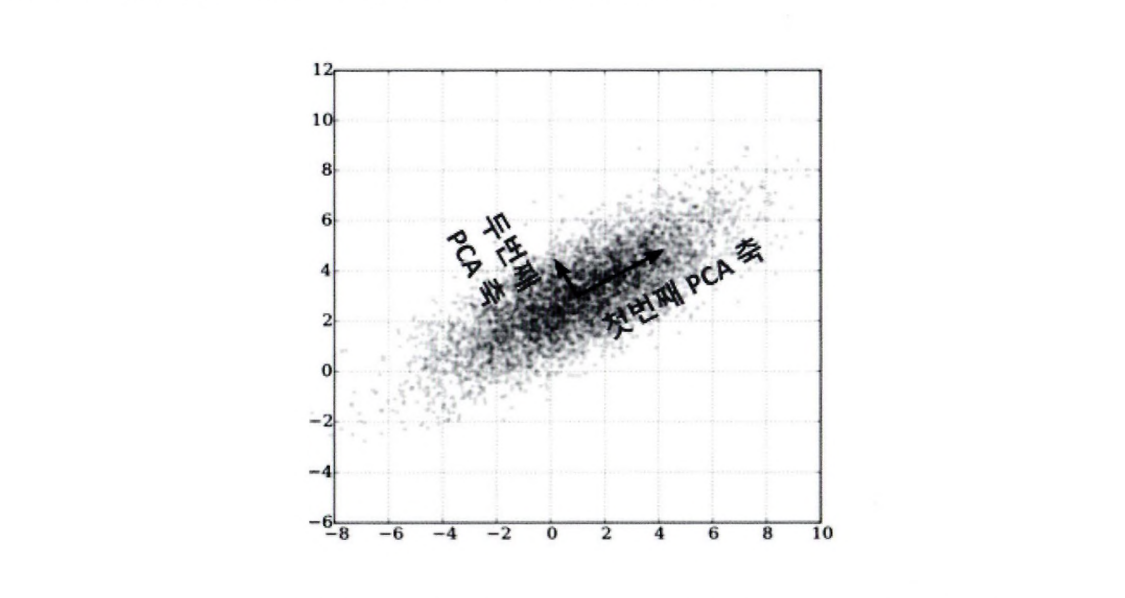

PCA, 즉 주성분 분석은 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있다.

PCA를 선형대수 관점에서 해석해보면 입력 데이터의 Covariance Matrix를 고유값 분해하고 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다. 이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타내고, eigenvalue는 고유 벡터의 크기를 나타내며 입력 데이터의 분산을 나타낸다.

입력 데이터의 Covariance Matrix를 $C$라고 하면 공분산 행렬의 특성으로 인해 다음과 같이 분해할 수 있다.

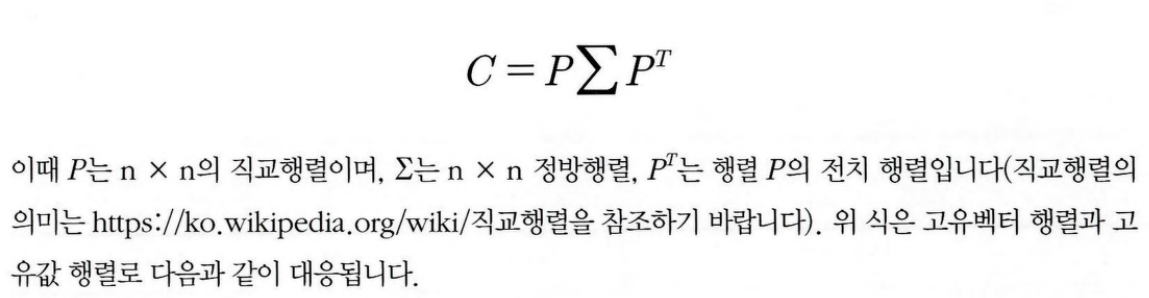

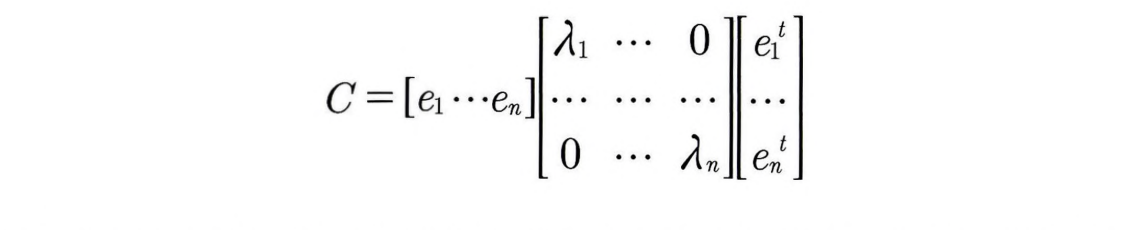

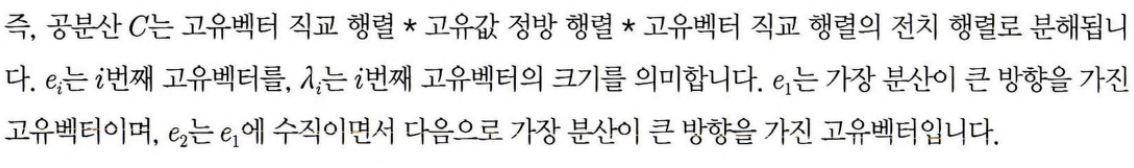

PCA는 다음과 같은 스텝으로 수행된다.

1. 입력 데이터 세트의 공분산 행렬을 생성한다.
2. 공분산 행렬의 고유벡터와 고유값을 계산한다.
3. 고유값이 가장 큰 순으로 K개만큼 고유벡터를 추출한다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

PCA를 통해 iris data의 4개의 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인해보자.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


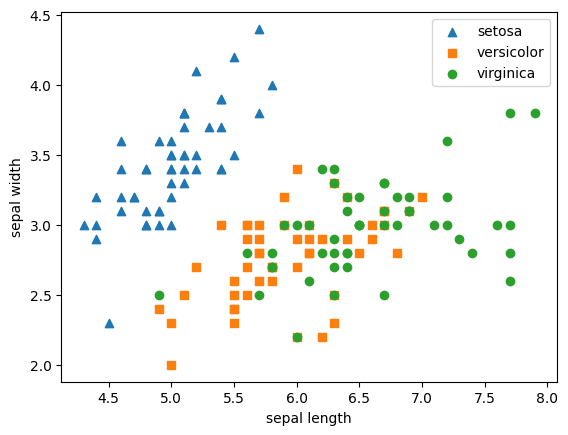

In [2]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미 표현
markers = ['^','s','o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2.
# 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

PCA로 4개 속성을 2개로 압축한 뒤 2개의 PCA 속성으로 iris 데이터의 품종 분포를 2차원으로 시각화 해보자.

먼저 iris 데이터 세트에 PCA를 적용하기 전에 개별 속성을 스케일링해야 한다. PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받는다. 따라서, 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요하다.

In [3]:
from sklearn.preprocessing import StandardScaler

# Target을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

사이킷런은 PCA 변환을 위해 PCA 클래스를 제공한다. PCA 클래스는 생성 파라미터로 n_components를 입력받는다. n_components는 PCA로 변환할 차원의 수를 의미하므로 여기서는 2로 설정한다. 이후에 fit과 transform을 호출해 PCA로 변환을 수행한다.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


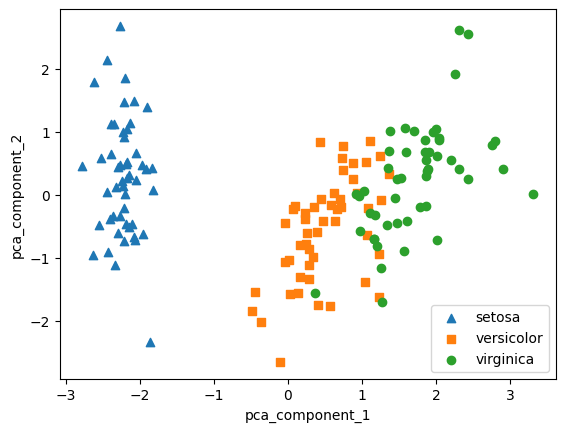

In [6]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미 표현
markers = ['^','s','o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2.
# 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

PCA로 변환한 후에도 pca_component_1 축을 기반으로 Setosa 품종은 명확히 구분이 가능하다. 이는 PCA의 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동서응ㄹ 잘 반영해씩 때문이다. PCA component 별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보기 위해 PCA 변환을 수행한 PCA 객체의 explained_variance_ratio 속성을 이용해 PCA 컴포넌트별로 차지하는 변동성 비율을 확인한다.

In [8]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


해당 결과 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95%를 설명할 수 있다.

이번에는 원본 iris dataset과 PCA로 변환된 dataset에 각각 분류를 적용한 후 결과를 비교해보자. Estimator는 RandomForestClassifier를 이용하고 cross_val_score( )로 3개의 교차 검증 세트로 정확도 결과를 비교한다.

In [9]:
# RandomForest 이용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [11]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


위 iris data의 경우 4개의 속성이 2개의 변환 속성으로 감소하며 예측 성능의 정확도가 원본 데이터 대비 8% 하락했다. 8% 정학도 하락은 비교적 큰 성능 수치의 감소지만 4개의 속성이 2개로 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있따.

다음으로 신용카드 고객 데이터 세트를 이용해 좀 더 많은 피처를 가진 데이터 세트를 적은 PCA 컴포넌트 기반으로 변환한 뒤 예측 영향도가 어떻게 되는지 비교해보자.

In [13]:
import pandas as pd
df = pd.read_excel('pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [14]:
df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

<Axes: >

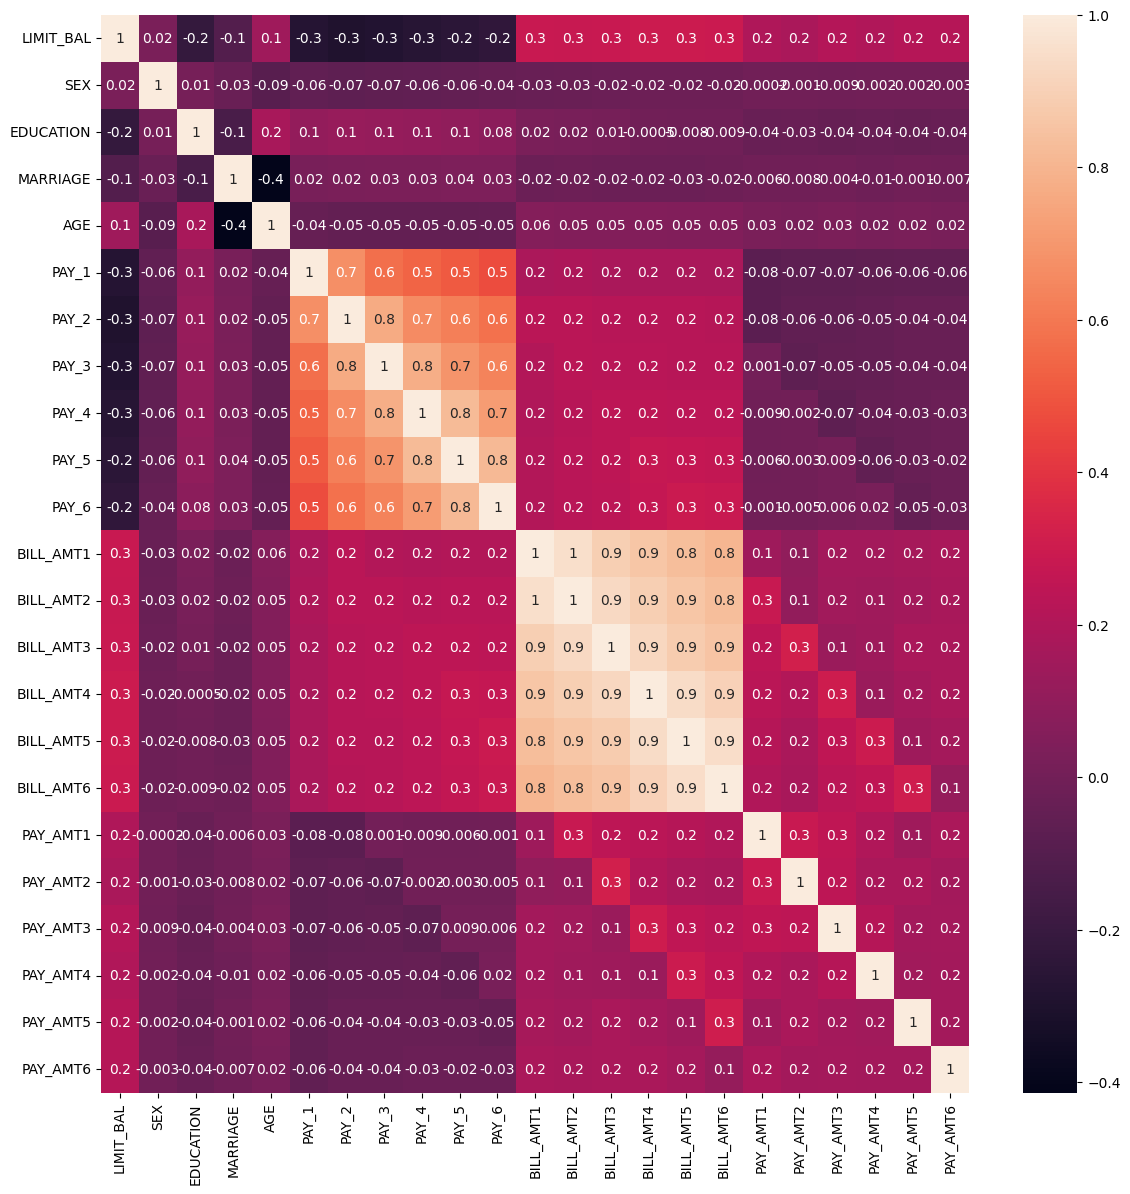

In [16]:
from ast import increment_lineno
# 속성 간 상관도 확인
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높으며 PAY_1 ~ PAY_6까지의 속성 역시 상관도가 높다.

이 BILL_AMT1 ~ BILL_AMT6까지 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성을 explained_variance_ratio_ 속성으로 알아본다.

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성 후, explained_variance_ratio_ 계산을 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:',pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있으며 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높다.

원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교해보자.

In [18]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3안 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3안 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7912 0.7974 0.802 ]
PCA 변환 데이터 세트 평균 정확도: 0.7969


전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생했따.

PCA는 차원 축소를 통해 데이터를 쉽게 인지하는 데 활용할 수 있지만, 이보다 더 활발하게 적용되는 영역은 Computer vision 분야이다. 특히 얼굴 인식의 경우 Eigen-face라고 불리는 PCA 변환으로 원본 얼굴 이미지를 변환해 사용하는 경우가 많다.

## **LDA(Linear Discriminant Analysis)**
### **LDA 개요**
LDA는 선형 판별 분석법으로 불리며, PCA와 매우 유사하다. LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소시키는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스르 ㄹ분별할 수 있는 기준을 최대한 유지하며 차원을 축소한다.

LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소한다. 즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식이다.

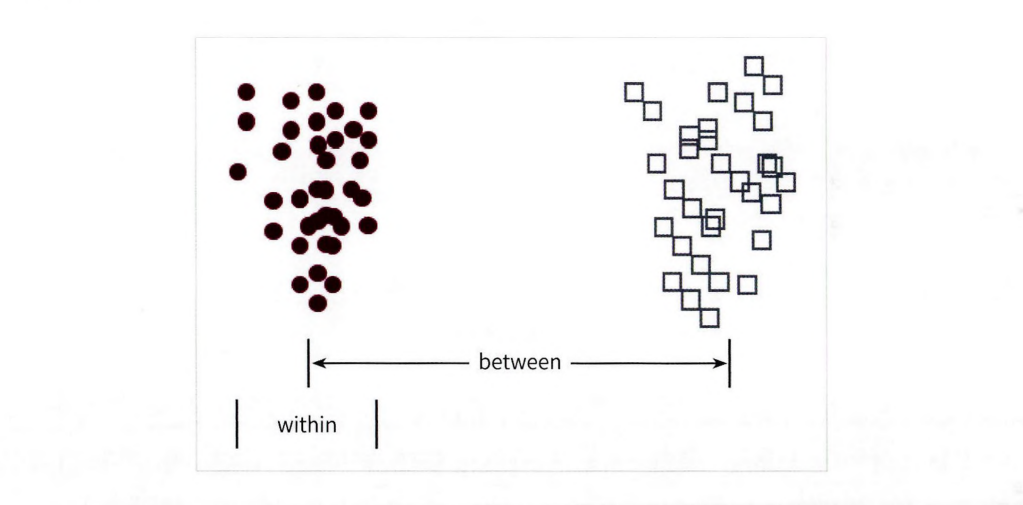

LDA를 구하는 스텝은 다음과 같다.

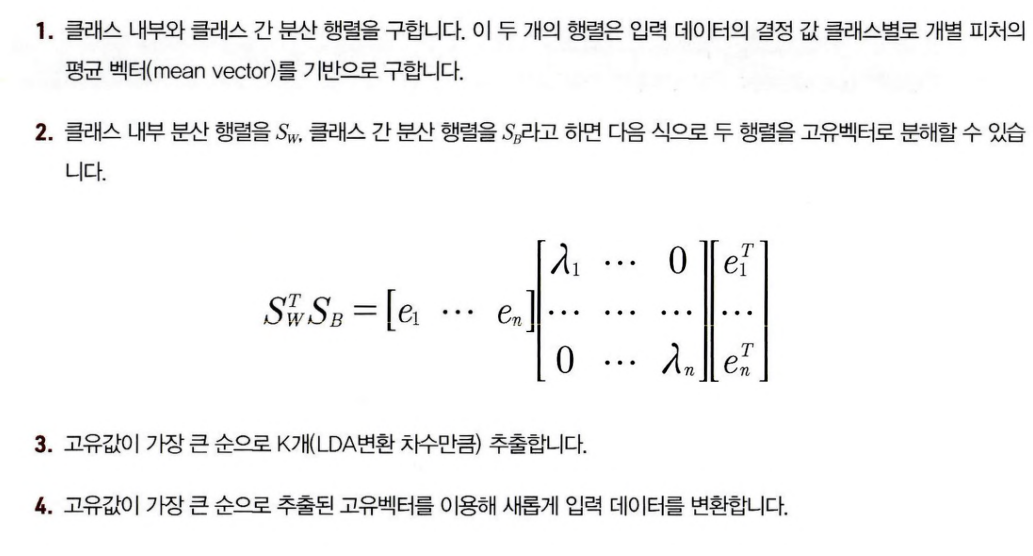

### **iris 데이터 세트에 LDA 적용하기**


In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

2개의 컴포넌트로 iris data를 LDA 변환한다. LDA는 PCA와 다르게 지도학습이기에 클래스의 결정 값이 변환 시에 필요하다. 따라서, lda 객체의 fit( ) 메서드를 호출할 때 결정값이 입력되었음에 유의해야 한다.

In [22]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


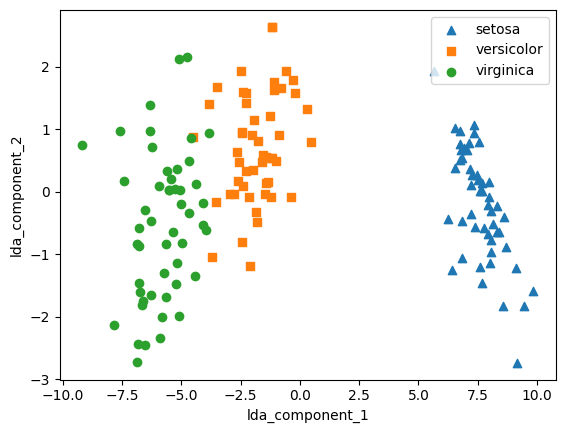

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미 표현
markers = ['^','s','o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2.
# 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

LDA로 변환된 iris data set를 시각화 해보면 PDA로 변환된 데이터와 좌우 대칭 형태로 많이 닮아 있음을 알 수 있다.

## **SVD**
### **SVD 개요**
SVD 역시 PCA와 유사한 행렬 분해 기법을 이용한다. PCA의 경우 정방행렬만을 고유벡터로 분해할 수 있지만 일반적으로 SVD는 m*n 크기의 행렬 A를 다음과 같이 분해한다.

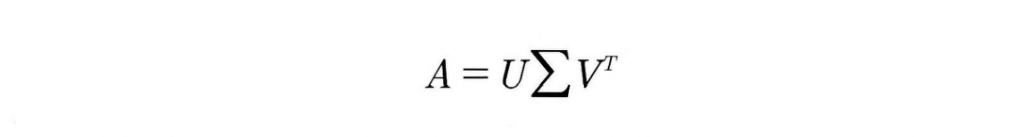

SVD는 특이값 분해로 불리며, 행렬 $U$와 $V$에 속한 벡터는 특이벡터이며, 모든 특이 벡터는 서로 직교하는 성질을 갖는다. $𝝨$는 대각행렬이며, 행렬의 diagonal 외에 모든 값이 0이다. $𝝨$이 위치한 0이 아닌 값이 바로 행렬 $A$의 특이값이다.

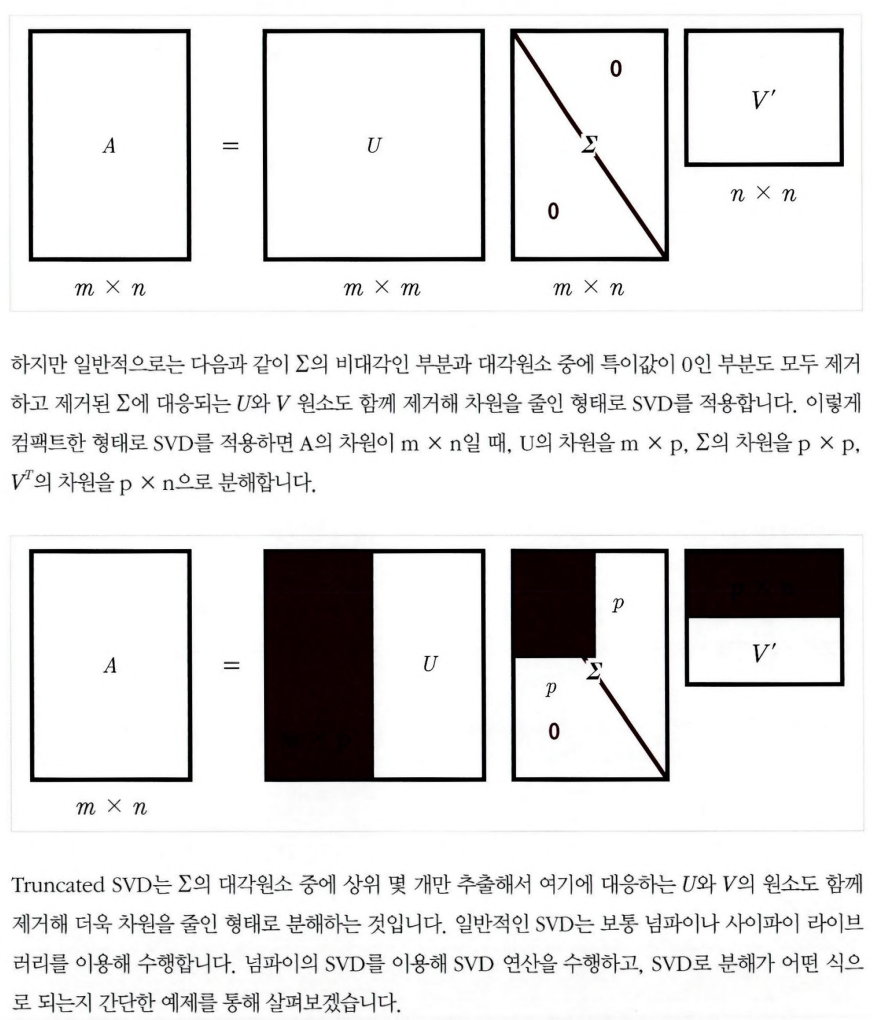

In [24]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4X4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


이렇게 생성된 a 행렬에 SVD를 적용한다.

In [25]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('V transpose matrix:\n',np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인한다. 각각의 벡터를 내적하면 된다.

In [26]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


동일하게 복원됨을 알 수 있다.

이번에는 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma 값이 변하고 이에 따른 차원 축소가 진행될 수 있는지 알아보자.

In [27]:
a[2] = a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


행렬은 이전과 다르게 로우 간 관계가 매우 높아졌다. 이 데이터를 SVD로 다시 분해해보자.

In [28]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변했다. 즉, 선형 독립인 로우 벡터의 개수가 2개라는 의미이다. 이렇게 분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 복원해보자

In [30]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape,Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


이번에는 Truncated SVD를 이용해 행렬을 분해해보자. Truncated SVD는 $𝞢$ 행렬에 있는 대각 원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해한다. 이렇게 분해하면 인위적으로 더 작은 차원의 matrix로 분해하기에 원본 행렬을 다시 원복할 수는 없다.

Truncated SVD를 사이파이 모듈을 이용해 간단히 테스트해보자.

In [31]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape,Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix,k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:',Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n',matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽히 복원되지 않고 근사적으로 복원됨을 알 수 있다.

### **사이킷런 TruncatedSVD 클래스를 이용해 반환**
사이킷런의 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지 않는다. 사이킷런의 TruncatedSVD 클래스는 PCA 클래스와 유사하게 fit( )와 transform( )을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소해 변환한다.

Text(0, 0.5, 'TruncatedSVD Component 2')

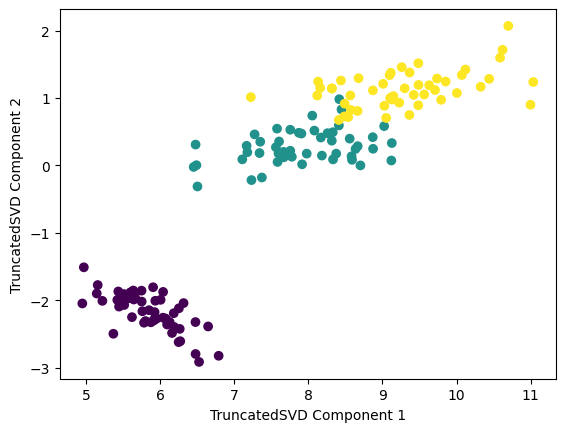

In [32]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

TruncatedSVD 변환 역시 PCA와 유사하게 변화 ㄴ후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어나 ㄴ고유성을 가지고 있음을 알 수 있다.

Text(0.5, 1.0, 'PCA Transformed')

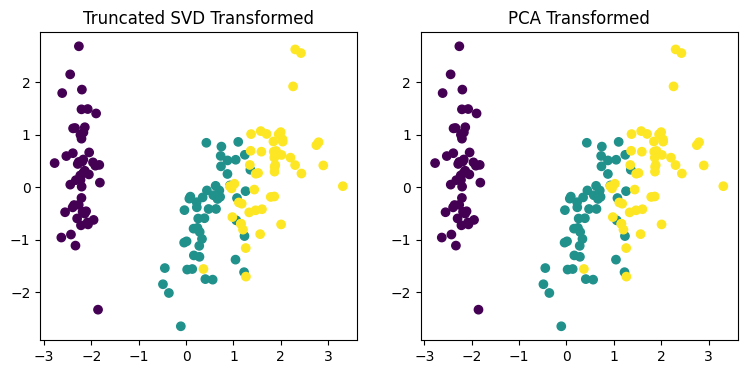

In [33]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1,ax2) = plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
ax2.scatter(x=iris_pca[:,0],y=iris_pca[:,1],c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

사이킷런의 TruncatedSVD와 PCA 클래스 구현을 확인해보면 두 개 클래스 모두 SVD를 이용해 행렬을 분해한다. iris 데이터를 스케일링으로 변환해 TruncatedSVD와 PCA 클래스 변환을 해보면 두 개가 거의 동일함을 알 수 있다.

In [34]:
print((iris_pca-iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

2.3390953525955403e-15
-7.632783294297951e-17


데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다. 이는 PCA가 SVD 알고리즘으로 구현됐음을 의미한다. 하지만, PCA는 밀집 행렬에 대한 변환만 가능하며 SVD는 희소 행렬에 대한 변환도 가능하다.

SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용된다. 또한 텍스트의 토픽 모델링 기법인 LSA의 기반 알고리즘이다.

## **NMF(Non-Negative Matrix Factorization)**

### **NMF 개요**
NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형이다. NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 다음과 가팅 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭한다.

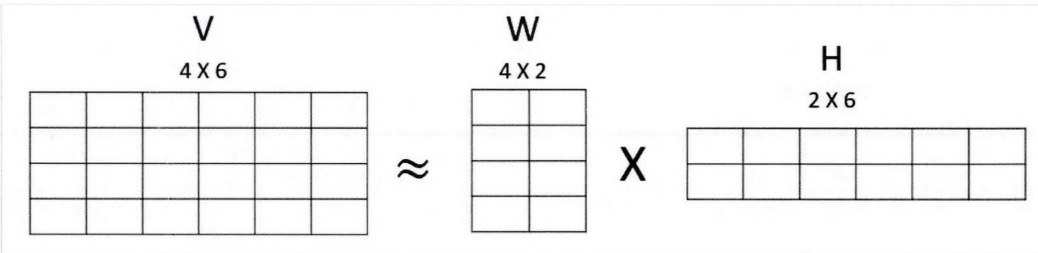

행렬 분해는 SVD와 같은 행렬 분해 기법을 통칭하는 것으로 이처럼 행렬 분해르 ㄹ하게 되면 $W$ 행렬과 $H$ 행렬은 일반적으로 길고 가는 행렬 $W$과 작고 넓은 행렬 $H$로 분해된다. 이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 된다. `분해 행렬 $W$는 원본 행에 대해 이 잠재 요소의 값이 얼마나 되는지에 대응하며 분해 행렬 $H$는 잠재 요소가 원본 열로 어떻게 구성됐는지를 나타내는 행렬이다.

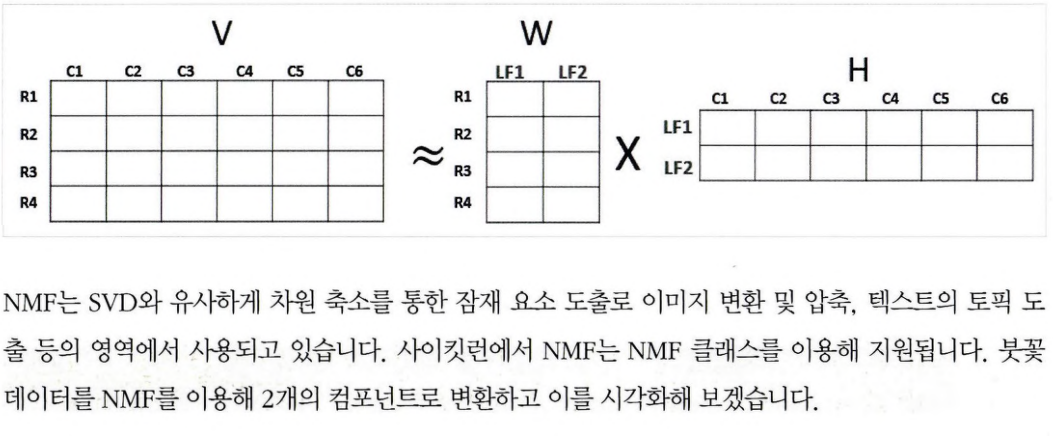

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

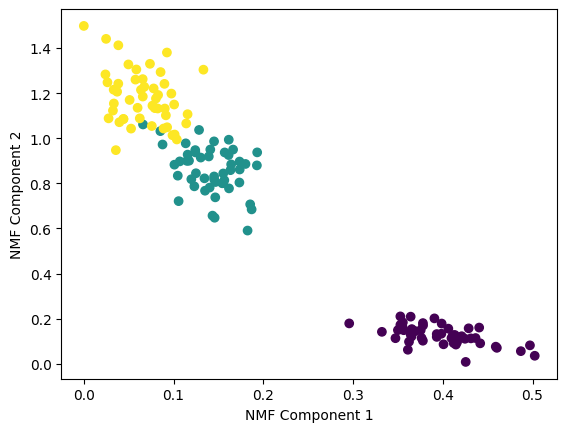

In [35]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0],y=iris_nmf[:,1],c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및
클러스터링에 잘 사용된다. 또한 영화 추천과 같은 추천(Recommendations) 영역에 활발하게 적용
됩니다. 사용자의 상품(예: 영화) 평가 데이터 세트인 사용자-평가 순위(user-Rating) 데이터 세트를 행렬 분해 기법을 통해 분해하면서 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를 통해 평가 순위(Rating)를 예측하고, 높은 순위로 예측된 상품을 추천해주는 방식이다.